# Importing Libraries

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Reading Dataset

In [33]:
# Creating dataframe

df = pd.read_csv("Yelp Restaurant Reviews.csv")

# Basic Analysis

In [34]:
# First 5 rows in the Dataset

df.head()

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...


In [35]:
# Shape of the Dataframe

df.shape

(19896, 4)

In [36]:
# Information about the Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Yelp URL     19896 non-null  object
 1   Rating       19896 non-null  int64 
 2   Date         19896 non-null  object
 3   Review Text  19896 non-null  object
dtypes: int64(1), object(3)
memory usage: 621.9+ KB


In [37]:
# Checking for Null Values

df.isna().sum()

Yelp URL       0
Rating         0
Date           0
Review Text    0
dtype: int64

In [38]:
# Checking for Duplicated Values

df.duplicated().sum()

0

In [39]:
# Occurence of Each Rating

df['Rating'].value_counts()

Rating
5    10883
4     4447
3     2069
2     1280
1     1217
Name: count, dtype: int64

# Feature Engineering

In [40]:
# Creating 'Liked' column if 'Rating' >= 4, Value is 1 else 0

df['Liked'] = np.where(df['Rating'].isin([4,5]),1,0 )

In [41]:
# Renaming 'Review Text' column

df['Review'] = df['Review Text']

In [42]:
# Dropping unwanted columns

df = df.drop(['Yelp URL', 'Date', 'Review Text', 'Rating'], axis=1)

In [43]:
# Information about the Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Liked   19896 non-null  int64 
 1   Review  19896 non-null  object
dtypes: int64(1), object(1)
memory usage: 311.0+ KB


In [44]:
# Value Counts of 'Liked' Column

df['Liked'].value_counts()

Liked
1    15330
0     4566
Name: count, dtype: int64

<Axes: xlabel='Liked', ylabel='count'>

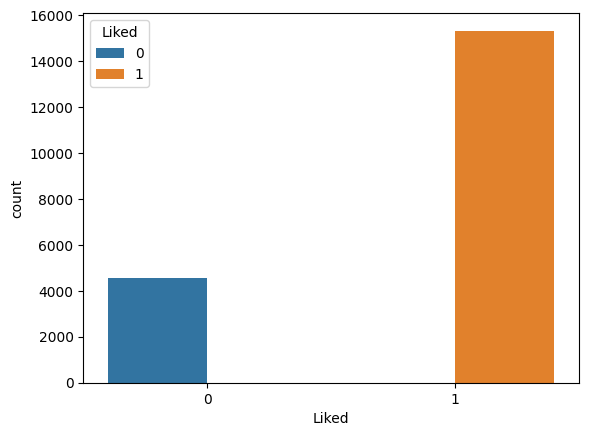

In [45]:
# Countplot of 'Liked' Column

sns.countplot(data=df, x='Liked', hue='Liked')

In [46]:
# DownSampling Dataframe

from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['Liked'])
y = df['Liked']

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Liked'] = y_resampled

In [47]:
# Value Counts of Resampled 'Liked' Column

df_balanced['Liked'].value_counts()

Liked
0    4566
1    4566
Name: count, dtype: int64

<Axes: xlabel='Liked', ylabel='count'>

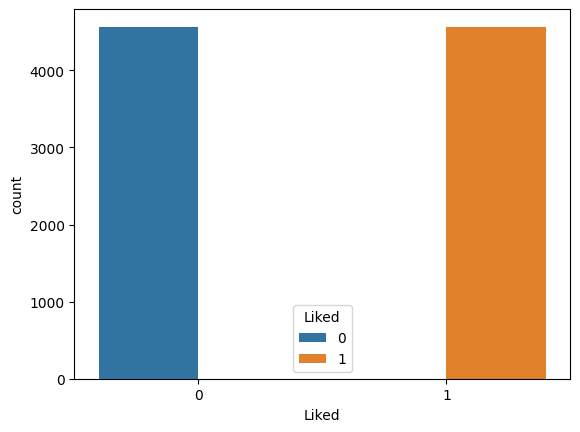

In [48]:
# Countplot of 'Liked' Column

sns.countplot(data=df_balanced, x='Liked', hue='Liked')

In [49]:
# Reset_index

df_balanced.index = range(len(df_balanced))

## Pre-Processing

In [50]:
# Pre-Processing 'Review' Column

import nltk
from nltk.corpus import stopwords
import re
from textblob import TextBlob

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text.lower())
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df_balanced['Review'] = df_balanced['Review'].apply(clean_text)
df_balanced['Review'] [:5]

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    softserve way sweet strange splendalike aftert...
1    went 1st time tonight ordered turtle tornado e...
2    local dairy barn served typical traditional am...
3    ice cream good service could improved rarely g...
4    seeing positive reviews rewind wanted stop che...
Name: Review, dtype: object

In [51]:
# Word Tokenize

import spacy

nlp = spacy.load('en_core_web_sm')

def word_tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc]

df_balanced['Review'] = df_balanced['Review'].apply(word_tokenize)

df_balanced['Review'][:5]

0    [softserve, way, sweet, strange, splendalike, ...
1    [went, 1st, time, tonight, ordered, turtle, to...
2    [local, dairy, barn, served, typical, traditio...
3    [ice, cream, good, service, could, improved, r...
4    [seeing, positive, reviews, rewind, wanted, st...
Name: Review, dtype: object

In [52]:
# Stemming

from nltk.stem import SnowballStemmer

ss = SnowballStemmer('english')

def stem_words(text):

    return ' '.join(ss.stem(word) for word in text)


df_balanced['Review'] = df_balanced['Review'].apply(stem_words)
df_balanced['Review'][:5]

0    softserv way sweet strang splendalik aftertast...
1    went 1st time tonight order turtl tornado exce...
2    local dairi barn serv typic tradit american da...
3    ice cream good servic could improv rare get ac...
4    see posit review rewind want stop check store ...
Name: Review, dtype: object

# Model Building & Evaluation

In [53]:
# X and y values

X = df_balanced['Review']
y = df_balanced['Liked']

In [54]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.30, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.30, random_state=1)

In [55]:
# Count Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_val_tfidf = tfidf.transform(X_val).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [56]:
# reduce memory usage

X_train_tfidf = X_train_tfidf.astype('float16')
X_val_tfidf = X_val_tfidf.astype('float16')
X_test_tfidf = X_test_tfidf.astype('float16')

In [57]:
# Importing Libraries

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 

In [82]:
def predict(model,param_grid):
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=2,verbose=0, pre_dispatch="2*n_jobs")
    grid.fit(X_train_tfidf, y_train)
    
    y_train_pred = grid.predict(X_train_tfidf)

    y_val_pred = grid.predict(X_val_tfidf)

    y_test_pred = grid.predict(X_test_tfidf)

    print("--------------------------------------------------------")
    print(f"Best Hyperparameters: {grid.best_params_}")
    print("--------------------------------------------------------")
    print(f"Model Accuracy on Train Data: {accuracy_score(y_train, y_train_pred):.4f}")
    print("--------------------------------------------------------")
    print(f"Model Accuracy on Val Data: {accuracy_score(y_val, y_val_pred):.4f}")
    print("--------------------------------------------------------")
    print(f"Model Accuracy on Test Data: {accuracy_score(y_test, y_test_pred):.4f}")
    print("--------------------------------------------------------")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")
    print("--------------------------------------------------------")
    print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")

In [83]:
# param_grid of different models

param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

param_grid_nb = {
    'alpha': [0.01, 0.1, 0.5, 1, 5, 10],
    'fit_prior': [True, False]
}

param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3],
    'learning_rate': [0.05],
}

In [84]:
# MultinomialNB

predict(MultinomialNB(), param_grid_nb)

--------------------------------------------------------
Best Hyperparameters: {'alpha': 0.5, 'fit_prior': True}
--------------------------------------------------------
Model Accuracy on Train Data: 0.9125
--------------------------------------------------------
Model Accuracy on Val Data: 0.8389
--------------------------------------------------------
Model Accuracy on Test Data: 0.8467
--------------------------------------------------------
Confusion Matrix:
[[351  67]
 [ 59 345]]
--------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       418
           1       0.84      0.85      0.85       404

    accuracy                           0.85       822
   macro avg       0.85      0.85      0.85       822
weighted avg       0.85      0.85      0.85       822



In [85]:
# LogisticRegression

predict(LogisticRegression(), param_grid_logistic)

--------------------------------------------------------
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
--------------------------------------------------------
Model Accuracy on Train Data: 0.9180
--------------------------------------------------------
Model Accuracy on Val Data: 0.8691
--------------------------------------------------------
Model Accuracy on Test Data: 0.8637
--------------------------------------------------------
Confusion Matrix:
[[357  61]
 [ 51 353]]
--------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       418
           1       0.85      0.87      0.86       404

    accuracy                           0.86       822
   macro avg       0.86      0.86      0.86       822
weighted avg       0.86      0.86      0.86       822



In [86]:
# XGBClassifier

predict(XGBClassifier(), param_grid_xgb)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


--------------------------------------------------------
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
--------------------------------------------------------
Model Accuracy on Train Data: 0.8262
--------------------------------------------------------
Model Accuracy on Val Data: 0.7972
--------------------------------------------------------
Model Accuracy on Test Data: 0.7871
--------------------------------------------------------
Confusion Matrix:
[[336  82]
 [ 93 311]]
--------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       418
           1       0.79      0.77      0.78       404

    accuracy                           0.79       822
   macro avg       0.79      0.79      0.79       822
weighted avg       0.79      0.79      0.79       822



## Conclusion

***Logistic Regression is the best choice since it has the highest test accuracy, generalizes well, and does not overfit.***